In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import StratifiedShuffleSplit

from torch.utils.data import Dataset, DataLoader



In [2]:
import glob
import os
import scipy.io as sio

dir_groundtruths = '/home/numairahmed/deepDIC/images/image_sample_pairs/gts6' # use your path


all_files1 = glob.glob(os.path.join(dir_groundtruths, "*.mat"))



def aggregate_data(all_files):
    i = 0
    li = [] #store max disp values in here
    for filename in all_files:
        i += 1
        gt = sio.loadmat(filename)['Disp_field_1'].astype(float)
        gt = np.asarray(gt)


        li.append(gt)

    
    print()
    print(f"size of dataframe: {len(li)}")
    # print(li.iloc[0,:])
    
    return li

data_agg = aggregate_data(all_files1)
print(data_agg[0].shape)


size of dataframe: 163
(2, 256, 256)


In [3]:
max_dispx = []
max_dispy = []
max_disp = []
for (dispx,dispy) in data_agg:
    max_x = np.amax(dispx)
    max_dispx.append(max_x)
    max_y = np.amax(dispy)
    max_dispy.append(max_y)
    max_d = np.sqrt( max_x**2 + max_y**2 )
    max_disp.append(max_d)
    
print(len(max_dispx))



163


In [4]:
print(max_dispx[0:5])

[0.5569943456659048, -8.481997948110505, -1.09370168815664, 4.3945380345998215, 13.532612259133264]


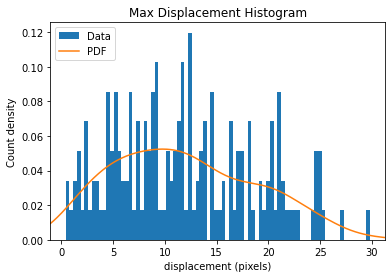

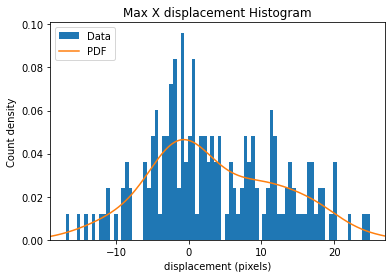

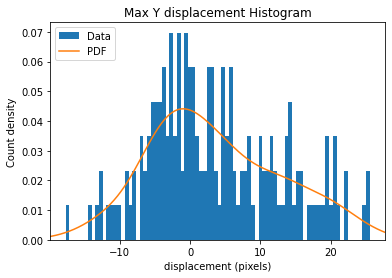

In [5]:
import scipy.stats as st

plt.figure()
plt.hist(max_disp, density=True, bins=82, label="Data")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(max_disp)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel("Count density")
plt.xlabel("displacement (pixels)")
# plt.xlim([0,50])
plt.title("Max Displacement Histogram")

plt.figure()
plt.hist(max_dispx, density=True, bins=82, label="Data")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(max_dispx)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel("Count density")
plt.xlabel("displacement (pixels)")
plt.title("Max X displacement Histogram")

plt.figure()
plt.hist(max_dispy, density=True, bins=82, label="Data")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(max_dispy)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel("Count density")
plt.xlabel("displacement (pixels)")
plt.title("Max Y displacement Histogram")


plt.show()